In [6]:
import pandas as pd
import ssl

In [7]:
ssl._create_default_https_context = ssl._create_unverified_context

df = pd.read_csv("https://raw.githubusercontent.com/drobaina/Python/main/microdados_ed_basica_RJ_2022.csv", header=0)
df.head()


,Unnamed: 0,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,0,2022,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,10.0,20.0,0.0,0.0,8.0,0.0,8.0,21.0,21.0,0.0
1,1,2022,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0
2,2,2022,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,0.0,8.0,1.0,1.0,4.0,0.0,4.0,5.0,5.0,0.0
3,3,2022,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,8.0,32.0,10.0,10.0,0.0,0.0,0.0,27.0,27.0,0.0
4,4,2022,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,8.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [43]:
# read xlsx
dictionary = pd.read_excel("https://raw.githubusercontent.com/drobaina/Python/main/dicionariodedados.xlsx", header=0)
# remove first and last 8 rows and select columns
dictionary = dictionary.iloc[8:-8, [1, 2, 5]]
dictionary.columns = ["Nome da Variável", "Descrição da Variável", "Categoria"]
# reset index
dictionary = dictionary.reset_index(drop=True)
dictionary

,Nome da Variável,Descrição da Variável,Categoria
0,NU_ANO_CENSO,Ano do Censo,NaN
1,NO_REGIAO,Nome da Região Geográfica,NaN
2,CO_REGIAO,Código da Região Geográfica,NaN
3,NO_UF,Nome da Unidade da Federação,NaN
4,SG_UF,Sigla da Unidade da Federação,NaN
...,...,...,...
386,QT_TUR_MED,Número de Turmas de Ensino Médio,NaN
387,QT_TUR_PROF,Número de Turmas de Educação Profissional,NaN
388,QT_TUR_PROF_TEC,Número de Turmas de Educação Profissional Técnica,NaN
389,QT_TUR_EJA,Número de Turmas de Educação de Jovens e Adult...,NaN


### Filtering City "Campos dos Goytacazes"

In [21]:
df_Campos = df[df["NO_MUNICIPIO"] == "Campos dos Goytacazes"]
df_Campos.head()

,Unnamed: 0,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
1415,1415,2022,Sudeste,3,Rio de Janeiro,RJ,33,Campos dos Goytacazes,3301009,Norte Fluminense,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1416,1416,2022,Sudeste,3,Rio de Janeiro,RJ,33,Campos dos Goytacazes,3301009,Norte Fluminense,...,14.0,0.0,0.0,0.0,4.0,4.0,0.0,17.0,17.0,0.0
1417,1417,2022,Sudeste,3,Rio de Janeiro,RJ,33,Campos dos Goytacazes,3301009,Norte Fluminense,...,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1418,1418,2022,Sudeste,3,Rio de Janeiro,RJ,33,Campos dos Goytacazes,3301009,Norte Fluminense,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0
1419,1419,2022,Sudeste,3,Rio de Janeiro,RJ,33,Campos dos Goytacazes,3301009,Norte Fluminense,...,10.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


#### Grouping top 10 cities with public and private schools

In [22]:
public_schools = df[df["TP_DEPENDENCIA"].isin([1, 2, 3])]
public_schools["NO_MUNICIPIO"].value_counts().head(10)

Rio de Janeiro           1995
Campos dos Goytacazes     344
Duque de Caxias           274
Nova Iguaçu               228
São Gonçalo               203
Petrópolis                198
Macaé                     162
Araruama                  159
Nova Friburgo             155
Niterói                   146
Name: NO_MUNICIPIO, dtype: int64

In [23]:
private_schools = df[df["TP_DEPENDENCIA"] == 4]
private_schools["NO_MUNICIPIO"].value_counts().head(10)

Rio de Janeiro           2492
São Gonçalo               382
Duque de Caxias           344
Nova Iguaçu               314
Niterói                   260
São João de Meriti        200
Campos dos Goytacazes     174
Belford Roxo              149
Petrópolis                109
Nilópolis                  82
Name: NO_MUNICIPIO, dtype: int64

#### Grouping Total of Computers by City

In [29]:
# Agrupar os dados por cidade e dependência administrativa
grouped = df.groupby(['NO_MUNICIPIO'])['IN_COMPUTADOR'].sum().reset_index()

# Renomear as colunas para ficarem mais claras
grouped.columns = ['Cidade', 'Computadores por Cidade']
grouped


,Cidade,Computadores por Cidade
0,Angra dos Reis,139.0
1,Aperibé,13.0
2,Araruama,87.0
3,Areal,15.0
4,Armação dos Búzios,34.0
...,...,...
87,Três Rios,67.0
88,Valença,73.0
89,Varre-Sai,14.0
90,Vassouras,34.0


#### Counting presence of water, bathroom and kitchen in schools

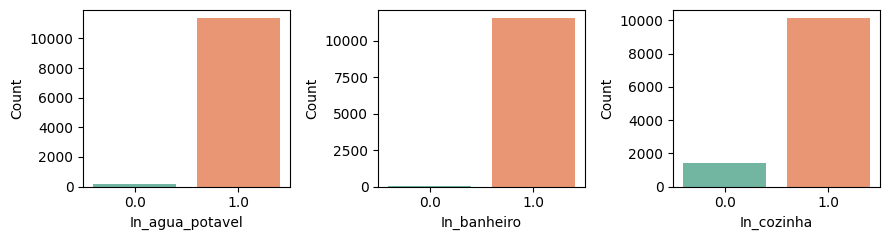

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 2.5))

for i, variable in enumerate(['IN_AGUA_POTAVEL', 'IN_BANHEIRO', 'IN_COZINHA']):
    ax = sns.countplot(x=variable, data=df, ax=axes[i], palette='Set2')
    ax.set_xlabel(variable.capitalize())
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()#